In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_regression, chi2, SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from termcolor import colored

# ANOVA F-value For Feature Selection Data Pure

In [187]:
def anovaF(X,y,k=10):
    f_value = SelectKBest(f_classif,k=k)
    X_best = f_value.fit(X,y)
    fig, ax = plt.subplots(figsize = (20,10))
    scores = X_best.scores_
    atrib = X_best.get_support()
    atributos = [data_i.columns[i] for i in list(atrib.nonzero()[0])]
    ax = plt.rcParams["figure.figsize"] = [24,18]
    ax = plt.plot(scores)
    plt.xticks(np.arange(30),np.arange(30), size = 15 )
    plt.yticks(size = 15)
    return atributos

# ExtraTreesClassifier Data Pure

In [188]:
def treesClassifierData(X,y):
    clf = ExtraTreesClassifier(n_estimators = 36)
    clf = clf.fit(X,y)
    model = SelectFromModel(clf, prefit=True)
    best_features_segundo_metodo = X[X.columns[model.get_support(indices = True)]].columns
    return best_features_segundo_metodo

# LDA Data Pure

In [189]:
def ldaData(X,y):
    lda = LinearDiscriminantAnalysis(n_components=None)
    X_lda = lda.fit(X, y)
    X_lda
    model = SelectFromModel(X_lda, prefit=True)
    best_features_tercer_metodo = X[X.columns[model.get_support(indices = True)]].columns
    return best_features_tercer_metodo

# Load Data

### Data Pure

In [190]:
data_i = pd.read_csv('dataA.csv')
data_i.head(1)

,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,...,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,First_Protocol_ICMP,First_Protocol_ICMP6,First_Protocol_TCP,First_Protocol_UDP,Type_mine
0,-0.084787,-0.68541,-0.244709,-0.196223,0.361252,-0.132463,-0.625504,-0.317443,-0.359303,-0.336093,...,-0.343648,-0.398552,-0.417145,-0.476095,-0.558694,0,0,1,0,0


Anova, chi2, forward selection, backward selection, Recursive Feature Elimination, Lasso, Ridge

In [191]:
y = data_i['Type_mine']
X = data_i.drop(['Type_mine'],axis = 1)

In [192]:
X.shape

(4733, 30)

### Correlacion

In [193]:
def tidy_corr_matrix(corr_mat):

    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = X.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(50)

,variable_1,variable_2,r,abs_r
325,#sp,#dp,0.997884,0.997884
350,#dp,#sp,0.997884,0.997884
541,p1_ip,p2_ip,0.996770,0.996770
566,p2_ip,p1_ip,0.996770,0.996770
593,p3_ip,p2_ip,0.991387,0.991387
568,p2_ip,p3_ip,0.991387,0.991387
674,p3_ib,p2_ib,0.989075,0.989075
649,p2_ib,p3_ib,0.989075,0.989075
157,min_d,p1_d,0.987711,0.987711
32,p1_d,min_d,0.987711,0.987711


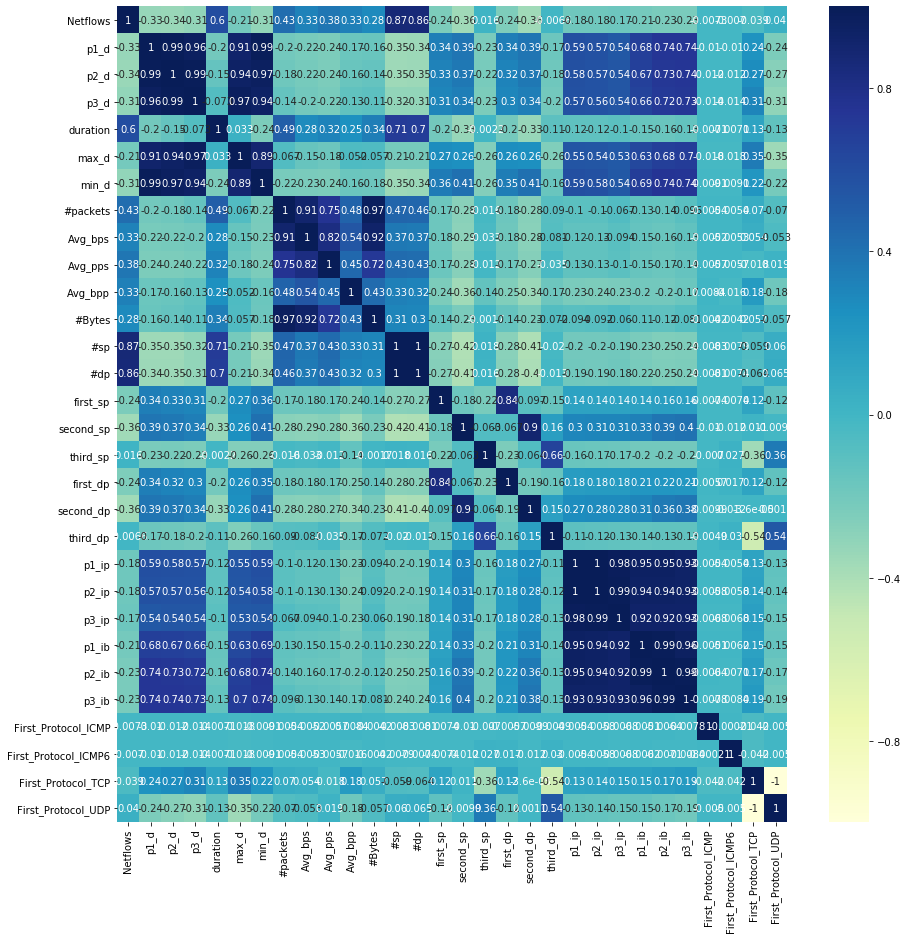

In [194]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(), annot=True, cmap="YlGnBu")

### Select Feature


In [195]:
data_i.columns

Index(['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp',
       'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib',
       'First_Protocol_ICMP', 'First_Protocol_ICMP6', 'First_Protocol_TCP',
       'First_Protocol_UDP', 'Type_mine'],
      dtype='object')

['p1_d', 'p2_d', 'p3_d', 'min_d', '#sp', 'second_sp', 'second_dp']


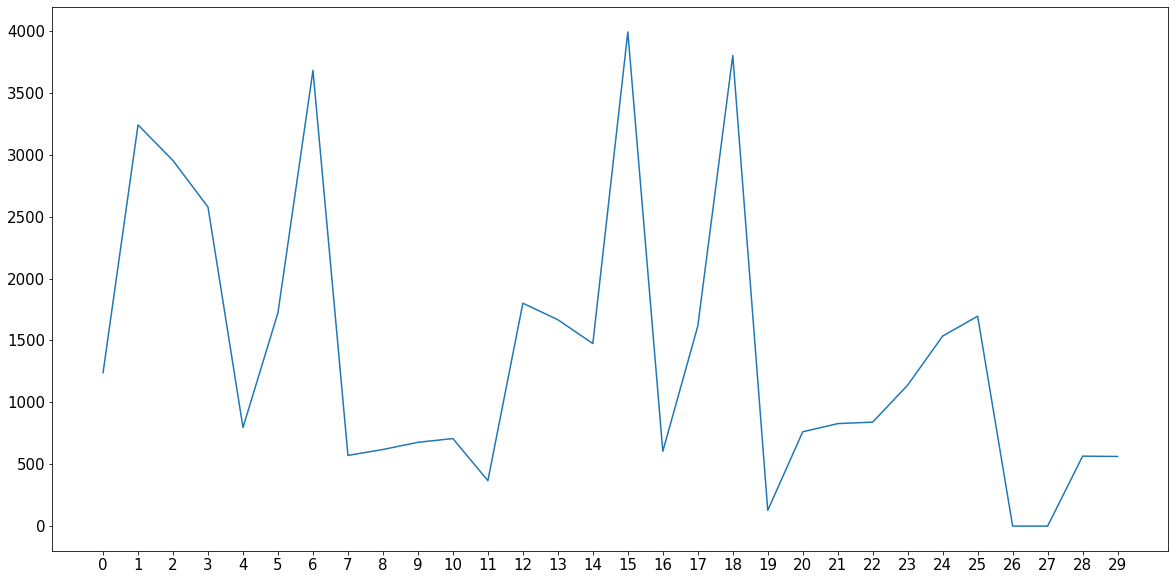

In [196]:
bestF1Me_p = anovaF(X,y,7)
print(bestF1Me_p)

In [197]:
bestF2Me_p = treesClassifierData(X,y)
bestF2Me_p

Index(['min_d', '#sp', 'first_sp', 'second_sp', 'first_dp', 'second_dp',
       'First_Protocol_TCP'],
      dtype='object')

In [198]:
bestF3Me_p = ldaData(X,y)
bestF3Me_p

Index(['min_d', '#sp', '#dp', 'first_sp', 'second_sp', 'first_dp', 'second_dp',
       'p1_ip', 'p3_ib', 'First_Protocol_ICMP6', 'First_Protocol_TCP',
       'First_Protocol_UDP'],
      dtype='object')

In [199]:
print(colored('Mejores caracteristicas mineria pura', attrs=['bold']))
best_feature_pure = ['p2_d', '#sp', 'max_d', 'second_sp','second_dp']

Mejores caracteristicas mineria pura


In [202]:
vif_data = pd.DataFrame() 
vif_data["feature"] = best_feature_pure
vif_data["VIF"] = [variance_inflation_factor(data_i[best_feature_pure].values, i) for i in range(len(best_feature_pure))] 

### Multicolinialidad de las mejores caracteristicas pura

In [203]:
vif_data

,feature,VIF
0,p2_d,12.210483
1,#sp,1.426423
2,max_d,10.779003
3,second_sp,5.563789
4,second_dp,5.571739


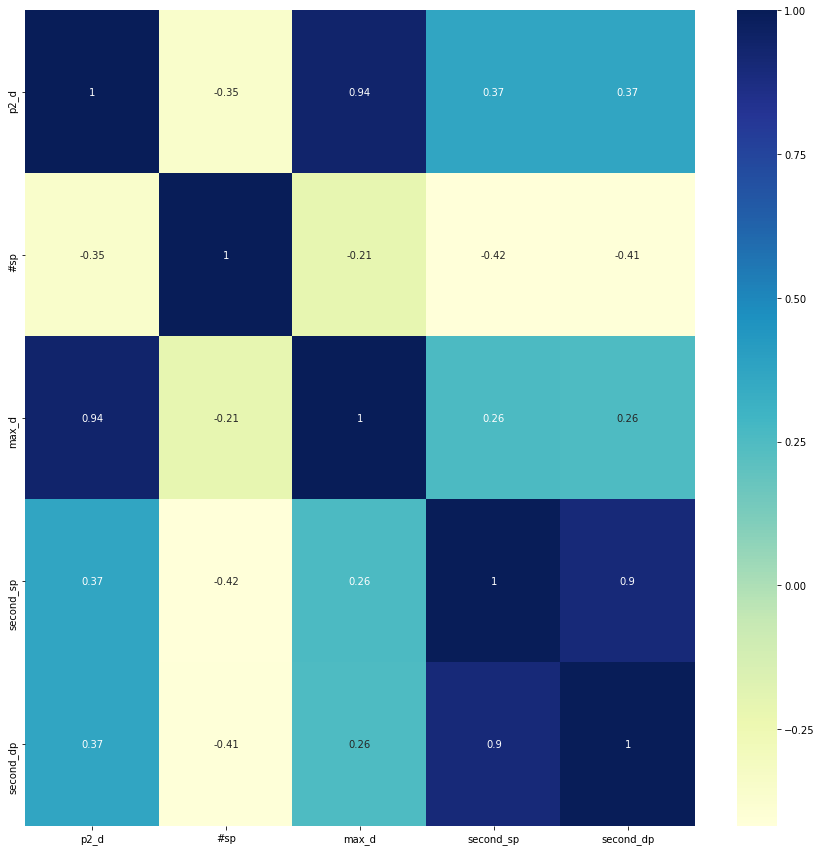

In [204]:
plt.figure(figsize=(15,15))
sns.heatmap(X[best_feature_pure].corr(), annot=True, cmap="YlGnBu")

### Data No Pure

In [205]:
data_n = pd.read_csv('dataB.csv')
data_n.head(1)

,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,...,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,First_Protocol_ICMP,First_Protocol_ICMP6,First_Protocol_TCP,First_Protocol_UDP,Type_mine
0,4.553656,-0.037927,-0.055406,-0.142137,15.85042,-0.126105,-0.01812,43.732192,127.789591,32.184816,...,0.725482,5.594429,-0.046617,0.189553,3.916348,0,0,1,0,1


In [206]:
data_n = pd.concat([data_n, data_i[data_i['Type_mine'] == 0]], axis = 0)

In [207]:
import random
data_n = data_n.reset_index()
indices = list(data_n.index)
random.shuffle(indices)
data_n = data_n.reindex(indices)
data_n.head(1)

,index,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,...,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,First_Protocol_ICMP,First_Protocol_ICMP6,First_Protocol_TCP,First_Protocol_UDP,Type_mine
22430,22430,-0.048218,-0.037927,-0.064791,-0.181777,-0.811166,-0.979657,-0.01812,-0.085602,-0.033987,...,-0.188257,-0.295768,-0.095017,-0.168736,-0.34954,0,1,0,0,1


In [209]:
y = data_n['Type_mine']
X = data_n.drop(['Type_mine','index'],axis = 1)

### Correlación

In [210]:
def tidy_corr_matrix(corr_mat):

    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = X.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(50)

,variable_1,variable_2,r,abs_r
325,#sp,#dp,0.994403,0.994403
350,#dp,#sp,0.994403,0.994403
191,#packets,Avg_pps,0.935944,0.935944
241,Avg_pps,#packets,0.935944,0.935944
219,Avg_bps,#Bytes,0.934616,0.934616
294,#Bytes,Avg_bps,0.934616,0.934616
182,#packets,Netflows,0.909736,0.909736
7,Netflows,#packets,0.909736,0.909736
12,Netflows,#sp,0.894325,0.894325
312,#sp,Netflows,0.894325,0.894325


### Multicolinialidad

In [211]:
vif_data = pd.DataFrame() 
vif_data["feature"] = data_n.columns
vif_data["VIF"] = [variance_inflation_factor(data_n.values, i) for i in range(len(data_n.columns))] 

In [212]:
vif_data[vif_data.VIF>5]

,feature,VIF
1,Netflows,28.658810
2,p1_d,6.092121
8,#packets,32.413866
9,Avg_bps,16.157129
10,Avg_pps,19.270084
12,#Bytes,17.956554
13,#sp,803.122094
14,#dp,559.701994
21,p1_ip,6.379052
22,p2_ip,6.113945


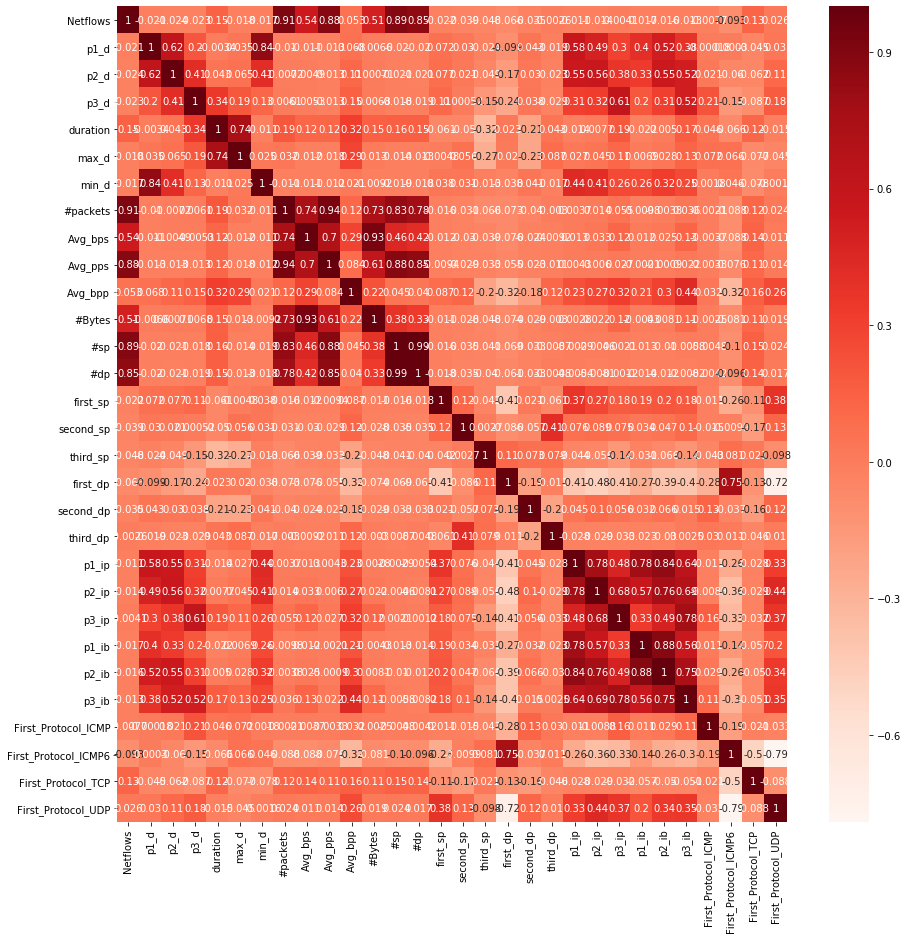

In [213]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(), annot=True, cmap="Reds")

### Select Feature

['min_d',
 'second_sp',
 'second_dp',
 'First_Protocol_ICMP6',
 'First_Protocol_TCP']

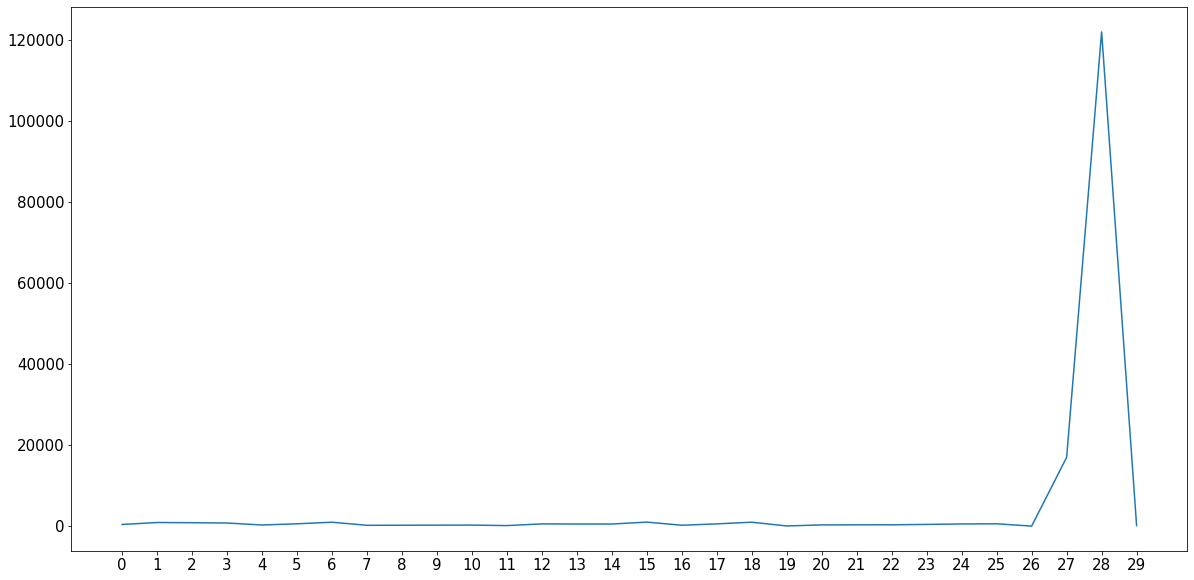

In [224]:
bestF1Me_n = anovaF(X,y,5)
bestF1Me_n

In [215]:
bestF2Me_n = treesClassifierData(X,y)
bestF2Me_n

Index(['p1_d', 'min_d', 'first_sp', 'third_sp', 'second_dp',
       'First_Protocol_ICMP6', 'First_Protocol_TCP', 'First_Protocol_UDP'],
      dtype='object')

In [216]:
bestF3Me_n = ldaData(X,y)
bestF3Me_n

Index(['First_Protocol_ICMP6', 'First_Protocol_TCP', 'First_Protocol_UDP'], dtype='object')

In [225]:
print(colored('Mejores caracteristicas mineria no pura', attrs=['bold']))
best_feature_no_pure = ['min_d', 'second_sp','second_dp','First_Protocol_ICMP6','First_Protocol_TCP']

Mejores caracteristicas mineria no pura


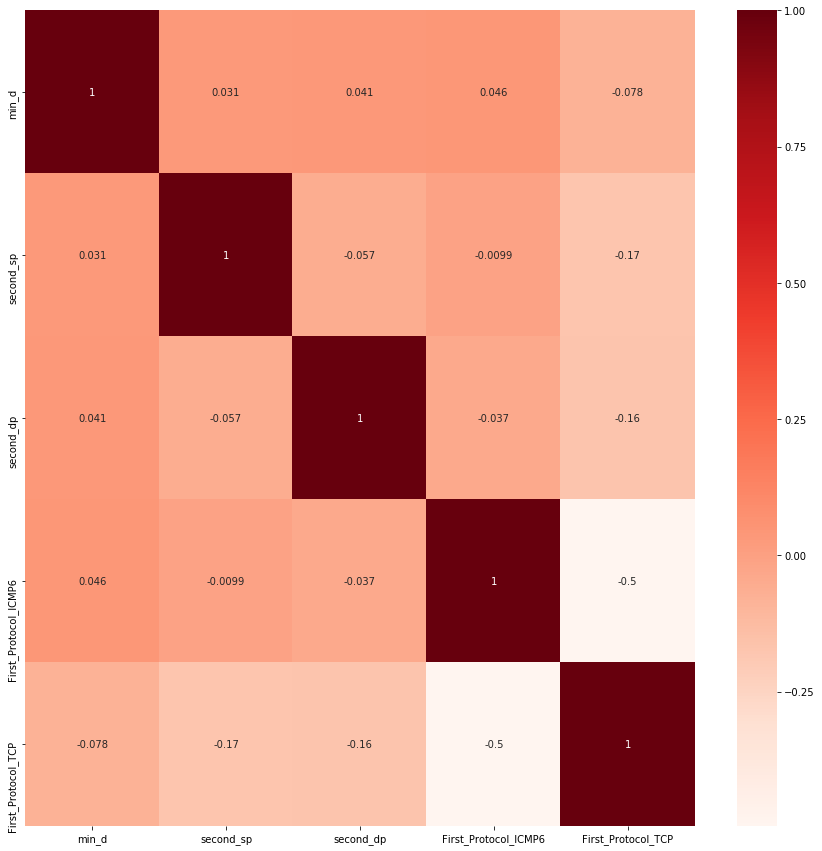

In [226]:
plt.figure(figsize=(15,15))
sns.heatmap(X[best_feature_no_pure].corr(), annot=True, cmap="Reds")